## Statics lab Python Jupyter notebook

This notebook is for the "static equilibrium of plane frameworks" lab, CUED IA.

The sections below will perform a few tasks that help you plot the graphs and perform the calculations required by the lab, at the same time demonstrating the versatility of Python libraries.

The steps include:
* Import all necessary packages;
* Create an empty, manipulable data table to enter experimental data into;
* Save data to CSV (comma separated values) file, and retrieve data from CSV;
* Plot graphs to compare axial forces in various bars of the truss;
* Perform linear regression on experimental data

As with all Jupyter notebooks, you can execute each section by clicking on the code in a section then pressing Ctrl+Enter.

### Import packages
This section imports the necessary packages in this script. The first four should be standard in most installations of Jupyter / Anaconda:
* `numpy`: for calculations
* `matplotlib.pyplot`: for plotting
* `ipywidgets`: interaction with plots
* `pandas`: manipulation of tabular data

The first line, `%matplotlib inline`, commands Jupyter to put all graphs from `matplotlib` on the Jupyter notebook itself rather than in separate windows. This is explained in further detail in [the IA Python session on graph plotting](https://notebooks.azure.com/garth-wells/projects/CUED-IA-Computing-Michaelmas/html/08%20Plotting.ipynb).

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import *
import pandas as pd
    

The last package required by this script, `ipysheet`, allows interaction with tabular data.

It is less commonly used, so it may not come pre-installed with your configuration of Jupyter / Anaconda. Installation instructions for ipysheet can be found [on this GitHub repo](https://github.com/QuantStack/ipysheet).

If you cannot install `ipysheet`, you can edit the data in `truss1.txt` in a text editor, then skip to the section on "Retrieving CSV data" below.

In [2]:
import ipysheet

### Create manipulable data tables

`pandas.DataFrame` is the most commonly used datatype in Python to handle tabular data. This section creates an empty table with column captions and row captions. The `numpy` functions `zeros` is used as a shortcut to generate a two-dimensional array of integer zeros.

You can adjust the values of `bar_count` and `stage_count` to suit your input data, or even change the code for `row_names` and `col_names` to use different column and row headings.

In [3]:
bar_count = 12
stage_count = 6 # Excludes initial stage
blank_boxes = np.zeros((stage_count+1, bar_count), dtype=int)

row_names = ['Initial'] + [("Stage %d" % ii) for ii in range(1, stage_count+1)]
col_names = [("Bar %d" % ii) for ii in range(1, bar_count+1)]

df1 = pd.DataFrame(blank_boxes, index=pd.Index(row_names), columns=pd.Index(col_names))
df1

,Bar 1,Bar 2,Bar 3,Bar 4,Bar 5,Bar 6,Bar 7,Bar 8,Bar 9,Bar 10,Bar 11,Bar 12
Initial,0,0,0,0,0,0,0,0,0,0,0,0
Stage 1,0,0,0,0,0,0,0,0,0,0,0,0
Stage 2,0,0,0,0,0,0,0,0,0,0,0,0
Stage 3,0,0,0,0,0,0,0,0,0,0,0,0
Stage 4,0,0,0,0,0,0,0,0,0,0,0,0
Stage 5,0,0,0,0,0,0,0,0,0,0,0,0
Stage 6,0,0,0,0,0,0,0,0,0,0,0,0


### Spreadsheet interface with ipysheet

The contents of a `DataFrame` can only be manipulated in the code. To provide a spreadsheet-like graphical user interface, `ipysheet` is used, with the `from_dataframe` function importing data from the `DataFrame` directly.

If the library `ipysheet` is imported successfully, you can click on any cell in the spreadsheet below to replace any of the values below with your own experimental data. When you press enter or tab after typing a value, the values stored in variable `sheet1` are updated too.

In [4]:
sheet1 = ipysheet.from_dataframe(df1)
sheet1

Sheet(cells=(Cell(choice=[], column_end=0, column_start=0, numeric_format='0[.]0', row_end=6, row_start=0, squ…

Next, the content of `sheet1` is copied back to the `df1`.

Note for students with advanced programming experience: This step is needed because `from_dataframe` and `to_dataframe` each makes a *copy* of the data (i.e. pass by value), rather than creating a *binding* between the `ipysheet` and the `DataFrame` (i.e. pass by reference). Therefore, when you change a number using the graphical spreadsheet interface above, the values in `df1` don't automatically follow `sheet1`.

In [5]:
df1 = ipysheet.to_dataframe(sheet1)
df1

,Bar 1,Bar 2,Bar 3,Bar 4,Bar 5,Bar 6,Bar 7,Bar 8,Bar 9,Bar 10,Bar 11,Bar 12
Initial,-1,2,3,0,0,0,0,0,0,0,0,0
Stage 1,0,0,0,0,0,0,0,0,0,0,0,0
Stage 2,0,0,0,0,0,0,0,0,0,0,0,0
Stage 3,0,0,0,0,0,0,0,0,0,0,0,0
Stage 4,0,0,0,0,0,0,0,0,0,0,0,0
Stage 5,0,0,0,0,0,0,0,0,0,0,0,0
Stage 6,0,0,0,0,0,0,0,0,0,0,0,0


We can then use a function provided by `pandas` to save the contents of `df1` to a text file.

In [6]:
df1.to_csv('truss1.txt')

### Retrieving CSV data

This section reads CSV (comma-separated values) data from the text file generated above (or a file in which you filled data using a text editor), and puts the data back into a `DataFrame`.

The `index_col` parameter tells `read_csv` that the left-most column of the CSV data should be treated as row headings, rather than a separate column of data.

In [7]:
csvfilename = 'truss1-CFRP-2019-10-18.txt' # Edit the file name here

df1 = pd.read_csv(csvfilename, index_col=0)
df1

,Bar 1,Bar 2,Bar 3,Bar 4,Bar 5,Bar 6,Bar 7,Bar 8,Bar 9,Bar 10,Bar 11,Bar 12
Initial,0,-4,2,4,0,-2,1,-7,1,1,0,-3
Stage 1,60,-30,-63,-19,48,-50,44,37,-52,47,47,36
Stage 2,124,-44,-132,-42,91,-92,90,81,-92,92,92,85
Stage 3,185,-69,-201,-69,140,-139,136,129,-140,156,138,118
Stage 4,239,-89,-267,-88,185,-182,185,173,-184,188,184,162
Stage 5,238,-88,-270,-90,186,-179,181,175,-184,190,180,155
Stage 6,299,-111,-339,-115,229,-226,226,220,-231,234,226,197


### Plot graphs

The `matplotlib.pyplot` object is used to plot graphs of strain gauge readings of two bars against each other. 

As shown in the syntax `df1[reference_bar]`, the square bracket notation conveniently gives the data in a column of a `DataFrame`. 

List comprehension is then used to plot readings from multiple bars against readings from Bar 1.

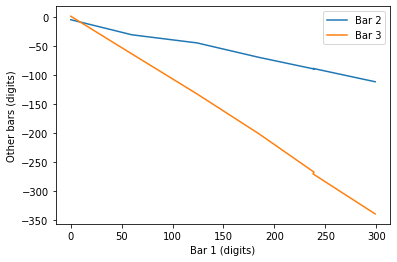

In [8]:
def plot_raw(reference_bar = 'Bar 1', plot_bars = ['Bar 2', 'Bar 3']):
    [plt.plot(df1[reference_bar], df1[plot_onebar], label = plot_onebar) for plot_onebar in plot_bars]
    plt.xlabel(reference_bar + ' (digits)')
    plt.ylabel('Other bars (digits)')
    plt.legend()
    plt.show()
    
plot_raw()

The graph above can be made interactive using `ipywidgets.interact`. The types of interactive elements are specified explicitly here because we want to rename the label (`description`), and `SelectMultiple` does not have a shorthand. The column headings of `df1` are used to automatically (using the convenient feature `.columns`) provide the options of what to plot.

You can use Ctrl+Click or Shift+Click to select multiple bars from the "Bars to plot" selection menu below.

In [9]:
col_names = list(df1.columns)

interact(plot_raw, reference_bar = Dropdown(options = col_names, description = 'x-axis'),
          plot_bars = SelectMultiple(options = col_names, value = col_names[1:3], description = 'Bars to plot'));

interactive(children=(Dropdown(description='x-axis', options=('Bar 1', 'Bar 2', 'Bar 3', 'Bar 4', 'Bar 5', 'Ba…

In this experiment, what matters is not the absolute reading from the strain gauges, but the changes in readings from the initial values. Therefore, the next section generates the plots after subtracting the initial values.

As shown by the syntax `df1[reference_bar][0]`, the first square bracket retrieves an object containing a column of data from the `DataFrame` using the column heading name; the second square bracket retrieves a single value from the column using an integer position index.

In [10]:
def plot_zeroed(reference_bar = 'Bar 1', plot_bars = ['Bar 2', 'Bar 3']):
    [plt.plot(df1[reference_bar] - df1[reference_bar][0], 
              df1[plot_onebar] - df1[plot_onebar][0], 
             label = plot_onebar
             ) for plot_onebar in plot_bars]
    plt.xlabel(reference_bar + ' (digits)')
    plt.ylabel('Other bars (digits)')
    plt.legend()
    plt.show()

interact(plot_zeroed, reference_bar = Dropdown(options = col_names, description = 'x-axis'),
          plot_bars = SelectMultiple(options = col_names, value = col_names[1:3], description = 'Bars to plot'));

interactive(children=(Dropdown(description='x-axis', options=('Bar 1', 'Bar 2', 'Bar 3', 'Bar 4', 'Bar 5', 'Ba…

In the experiment, you have obtained (or were given) a calibration factor that relates strain gauge meter readings to bar forces. We can also build this into the plot. The script below provides an additional interactive input box for you to type in the calibration factor in digits/kN.

In [11]:
def plot_calib(reference_bar = 'Bar 1', plot_bars = ['Bar 2', 'Bar 3'], calibration_factor = 83): 
    # Calibration factor is in digits/kN
    cf = calibration_factor
    [plt.plot((df1[reference_bar] - df1[reference_bar][0])/cf,
              (df1[plot_onebar] - df1[plot_onebar][0])/cf,
              label = plot_onebar
             ) for plot_onebar in plot_bars]
    plt.xlabel(reference_bar + ' (kN)')
    plt.ylabel('Other bars (kN)')
    plt.legend()
    plt.show()
    
interact(plot_calib, reference_bar = Dropdown(options = col_names, description = 'x-axis'),
          plot_bars = SelectMultiple(options = col_names, value = col_names[1:3], description = 'Bars to plot'),
        calibration_factor = IntText(83, description = 'Calibration'));

interactive(children=(Dropdown(description='x-axis', options=('Bar 1', 'Bar 2', 'Bar 3', 'Bar 4', 'Bar 5', 'Ba…

### Linear regression
The final part of this lab exercise is to verify the theory of static equilibrium with the experimental data. This is done by comparing the changes in strain gauge readings from different bars on the structure. Since the same calibration factor is applied to all bars, the ratio of strain gauge readings is the same as the ratio of bar forces.

The ratio of reading changes is extracted using linear regression. This functionality is provided by `numpy.polyfit`. As shown in the code below, the first input parameter to `polyfit` is for values of $x$, the second input parameter is for values of $y$, and the third parameter is an integer for the order of equation. A linear equation has order 1 because the highest power of $x$ in the equation $y = m x + c$ is 1.

In [12]:
reference_bar = 'Bar 1'
plot_onebar = 'Bar 3'

model = np.polyfit(df1[reference_bar], df1[plot_onebar], 1)
model

array([-1.14409237,  5.71225163])

`polyfit` returns a `numpy.array` with the head of the array being the highest-order coefficient. In other words, `model[0]` gives the slope $m$ of the best-fit straight line.

This can be built into another adaptation of the graph-plotting script from above. The experimental data points are plotted as a scatter graph, the best-fit line is plotted as a solid line, and the best-fit equation is given in the legend.

You can choose which bars to compare in this graph using the interactive drop-down boxes.

In [13]:
def plot_linreg(reference_bar, plot_onebar):
    model = np.polyfit(df1[reference_bar], df1[plot_onebar], 1)

    plt.scatter(df1[reference_bar], df1[plot_onebar], label = 'Expt data')

    c0 = model[1] # Intercept
    c1 = model[0] # Slope
    x0 = min(df1[reference_bar])
    x1 = max(df1[reference_bar])
    y0 = c0 + x0 * c1
    y1 = c0 + x1 * c1
    plt.plot([x0, x1], [y0, y1], label = ("y = %.3f x + %.1f" % (c1, c0)))
    plt.xlabel(reference_bar + ' (digits)')
    plt.ylabel(plot_onebar + ' (digits)')
    plt.legend()
    plt.show()

interact(plot_linreg, 
         reference_bar = Dropdown(options = col_names, value = col_names[0], description = 'x-axis'),
         plot_onebar = Dropdown(options = col_names, value = col_names[1], description = 'y-axis')
        );

interactive(children=(Dropdown(description='x-axis', options=('Bar 1', 'Bar 2', 'Bar 3', 'Bar 4', 'Bar 5', 'Ba…

Completing the discussion, this final section of code performs linear regression to find the ratio of strain gauge reading changes between all bars and Bar 1. The script uses list comprehension to loop through all the bars using `for .. in`, filtering out Bar 1 itself using `if .. is not`.

The results of linear regression are the presented in a table, using `DataFrame` again to provide the formatting.

In [14]:
reference_bar = 'Bar 1'
models = [np.polyfit(df1[reference_bar], df1[onebar], 1) for onebar in col_names if onebar is not col_names[0]]

dfc = pd.DataFrame([model[0] for model in models], index=pd.Index(col_names[1:]), columns=['Ratio vs ' + reference_bar])
dfc

,Ratio vs Bar 1
Bar 2,-0.351364
Bar 3,-1.144092
Bar 4,-0.396851
Bar 5,0.770708
Bar 6,-0.745390
Bar 7,0.762400
Bar 8,0.763492
Bar 9,-0.767179
Bar 10,0.791618
Bar 11,0.757575


Hopefully these ratios relative to Bar 1 will be close to the theoretical values you predicted by the principle of equilibrium (allowing for some experimental error, and for the fact that the joints are not perfectly pinned).

Thanks for using this Jupyter notebook!

Deryck Chan 2020